In [1]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

from grid import Grid
import pyproj

from perturb import random_field

In [2]:
##define the grid (topaz) for perturbations
import models.topaz.v5 as topaz

grid = topaz.read_grid('/cluster/work/users/yingyue/data/TP5')

ny, nx = grid.x.shape

In [3]:
t_start = datetime(2022, 1, 2)
dt = timedelta(hours=12)
nt = 28
nens = 100

In [12]:
import dataset.ERA5 as era5

##read variables from ERA5 data to prepare for atmos forcing
path = '/cluster/projects/nn2993k/ERA5'

##ERA5 grid
era5_grid = era5.read_grid(path)
era5_grid.dst_grid = grid

t = t_start
era5_pres = era5.read_var(path, era5_grid, name='atmos_surf_pres', time=t)
pres = era5_grid.convert(era5_pres)

era5_wind = era5.read_var(path, era5_grid, name='atmos_surf_wind', time=t)
wind = era5_grid.convert(era5_wind, is_vector=True)


In [6]:
##generate random perturbation

##spectrum with given hradius (old perturbation scheme)
#hradius = 
#pwrspec = 

##spectrum with given shape
power_law = -3  ##spectral slope
pwrspec = lambda k:k**((power_law-1)/2)

##spectrum with arbitrary variance at each specified wavenumber bands
def pwrspec(krange, k_var):
    
    return spec

pert = random_field(grid, pwrspec)

In [ ]:
##phase perturbation by displacement




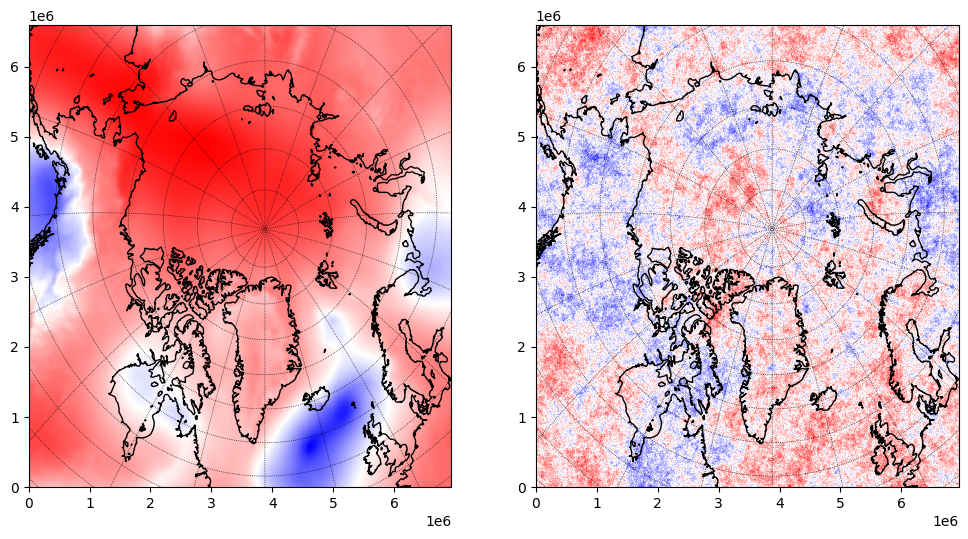

In [9]:
#visualise fields

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

grid.plot_field(ax[0], pres, cmap='bwr')
grid.plot_land(ax[0])

grid.plot_field(ax[1], pert, cmap='bwr')
grid.plot_land(ax[1])


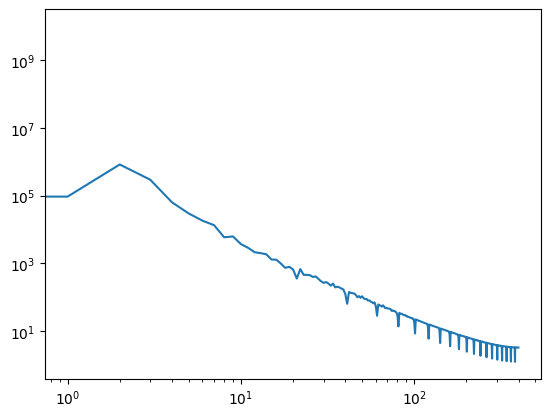

In [11]:
##visualize spectrum
from diag import pwrspec2d

wn, pwr = pwrspec2d(pres)

fig, ax = plt.subplots(1,1)
ax.loglog(wn, pwr)
#ax.set_ylim(1e-4, 1)

In [14]:
##save perturbations in forcing files
from models.topaz.abfile import ABFileForcing

filename = '/cluster/work/users/yingyue/forcing.a'

f = ABFileForcing(filename, 'w')

#f.write_field(field, mask, fieldname, dtime1, rdtime)

